### Problem: SuperSave Market Data Analysis

SuperSave Market is a rapidly growing supermarket chain with locations across multiple regions. The company has invested heavily in data collection systems to better understand customer preferences and optimize their inventory management. As part of their data-driven decision making initiative, you have been hired as a data analyst to extract actionable insights from their product and sales data.

The data you've been provided spans all product categories across the supermarket chain and includes information about pricing, inventory levels, sales performance, customer ratings, and purchasing methods.

**Files**:

    1. product_catalog.csv - Contains information about the different products sold by the supermarket chain
    2. inventory_sales.csv - Contains sales and inventory data

Your task is to analyze this data to identify patterns, test business hypotheses, and provide recommendations that can help SuperSave make informed decisions about their inventory management, pricing strategies, and promotional activities.

In [1]:
# Importing Modules to save you time

# Main Modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Disable SettingWithCopyWarning
# Ignores any warnings
pd.set_option('mode.chained_assignment', None)

### Reading the Data (no action required)

We begin by reading the 2 data files into distinct dataframes and exploring their contents.

In [2]:
# Read the data files
df_catalog = pd.read_csv('product_catalog.csv')
df_inventory = pd.read_csv('inventory_sales.csv')

In [3]:
df_catalog.head()

,Product_ID,Department,Product_Category,Price,Cost,Customer_Rating
0,F000000,Food,Frozen Foods,14.99,10.93,4.5
1,H000001,Health & Beauty,Hair Care,11.99,8.39,2.9
2,F000002,Food,Bakery,3.59,2.92,4.4
3,H000003,Household,Paper Products,4.84,4.35,3.6
4,H000004,Health & Beauty,Personal Care,18.29,12.57,3.5


In [4]:
df_inventory.head()

,Product_ID,Quantity_Sold,Inventory_Available,On_Promotion,Purchase_Method
0,F000000,15,27,No,In-Store
1,H000001,6,16,No,Online
2,F000002,66,126,No,In-Store
3,H000003,39,107,Yes,In-Store
4,H000004,6,11,No,In-Store


## Question 1: Merging [1.5 points]

### Question 1a
Your first task is to merge the two datasets to create a comprehensive view of SuperSave's products and their sales.

However, there is a catch. There are some files that have been catalogued but no inventory has been procured. Similarly, there are some products being tracked in the inventory system but have not been properly catalogued. In other words, there are a few products present in `df_catalog` but not `df_inventory` and vice-versa.

Merge the two files appropriately so that all products and their associated information are included in the final dataset, i.e., the final dataframe should contain products even if they are present in only one of the two files. Store the result in a dataframe called `df_supermarket`.

In [5]:
# Answer to 1a
df_supermarket = pd.merge(df_catalog, df_inventory, how = "inner", on = "Product_ID")

<font color='red'>For all subsequent questions, use the merged dataframe `df_supermarket` created in Question 1a.</font>

### Question 1b
This is a conceptual question, no code required. 

Suppose you are merging two dataframes A and B. Dataframe A has 200 rows and dataframe B has 300 rows. What is the minimum and maximum number of rows that can be present in the merged file C after an inner merge? Explain your reasoning.

**Explanation for 1b**

the minimum number is 200, after inner join method on product id, the maximum number is 300. since the identifying column may be different in both tables, and some entries might appear multiple times.

------
## Question 2: Missing Data and New Columns [2.5 points]

### Question 2a
Identify all columns with missing data. Devise and implement a strategy to handle the missing data using an appropriate method for each column. Use the following information:

- Ignore missing data in all columns except Customer_Rating and Cost.
- For the Customer_Rating column, it is known that products with missing information should have a rating of zero.
- For the Cost column, the presence of missing data is due to some suppliers who did not submit their cost estimates on time. These missing values can therefore, be assumed to be unbiased (i.e., they are missing at random).

In [6]:
# Answer to 2a
df_supermarket.columns

Index(['Product_ID', 'Department', 'Product_Category', 'Price', 'Cost',
       'Customer_Rating', 'Quantity_Sold', 'Inventory_Available',
       'On_Promotion', 'Purchase_Method'],
      dtype='object')

In [7]:
drop_cols = ['Product_ID', 'Department', 'Product_Category', 'Price',  'Quantity_Sold', 'Inventory_Available',
       'On_Promotion', 'Purchase_Method']

In [8]:
dfmarketClean=df_supermarket.dropna(subset=drop_cols)
dfmarketClean.isnull().sum()

Product_ID              0
Department              0
Product_Category        0
Price                   0
Cost                   12
Customer_Rating        37
Quantity_Sold           0
Inventory_Available     0
On_Promotion            0
Purchase_Method         0
dtype: int64

In [9]:
dfcustomerrating= dfmarketClean['Customer_Rating'].fillna(0)

In [10]:
cost_mean = dfmarketClean['Cost'].mean()
dfcostdata = dfmarketClean.fillna({"Cost":cost_mean})

**Explain your choices here:**

 Since the the cost column is typically average in fraction numbers, it is more appropriate to replace with the mean than the median. This is because the mean of the cost is fractional, if it's median then its not a reflection of the cost.

### Question 2b
Create two new columns, `Profit` and `Remaining_Inventory`.
- `Profit` should be calculated as: (Price - Cost) × Quantity_Sold
- `Remaining_Inventory` should be calculated as: Inventory_Available - Quantity_Sold

In [11]:
# Answer to 2b
dfmarketClean["Profit"] = (dfmarketClean["Price"] - dfmarketClean["Cost"])*(dfmarketClean["Quantity_Sold"])
dfmarketClean["Remaining_Inventory"]=(dfmarketClean["Inventory_Available"] - dfmarketClean["Quantity_Sold"])

### Question 2c
Save the cleaned dataframe (with additional columns) to a CSV file named 'supermarket.csv'. You will need this file for the PowerBI portion of the exam (Question 6), so go ahead and download it from Jupyter.

In [12]:
# Answer to 2c
dfmarketClean.to_csv("supermarket.csv",index=False)

<font color='red'>For all subsequent questions, use the cleaned dataframe with the new columns.</font>

## Question 3: Understanding our Data [3 points]

### Question 3a
Which department generates the most sales (Column: `Quantity_Sold`) on average? Answer using a bar chart.

<Axes: xlabel='Department'>

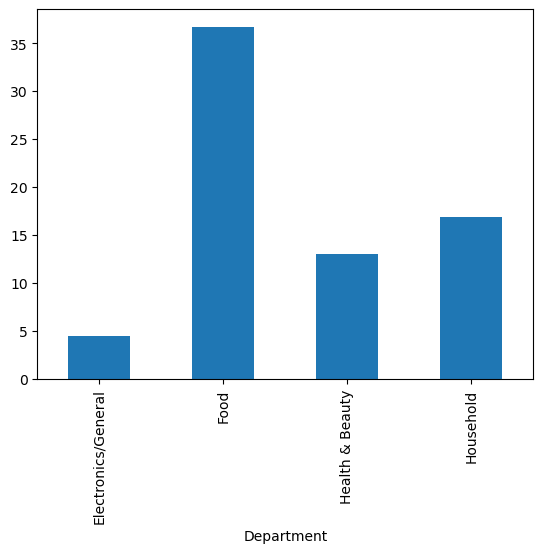

In [13]:
# Answer to 3a
dfmarketgrouped = dfmarketClean.groupby("Department")["Quantity_Sold"].mean()
dfmarketgrouped.plot.bar()

**Explanation** Food department generates the most sales  on average

### Question 3b
The CEO wishes to announce to the board that 'at least 20\% of all products in our catalogue are purchased online'. Using a pie chart, argue whether or not the CEO can go ahead with the announcement.

    Note: Each row here is a single product.

<Axes: ylabel='count'>

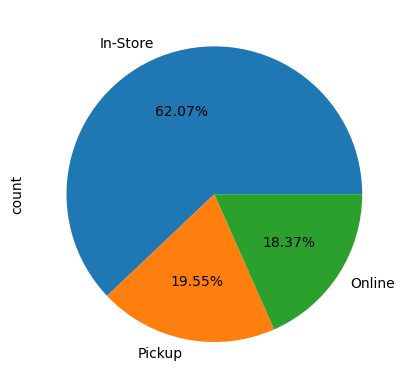

In [14]:
# Answer to 3b
dfmarketClean["Purchase_Method"].value_counts().plot.pie(autopct='%.2f%%')

**Explanation** the CEO can't say that. Since only 18.37% of the products are purchased online, as shown in this pie chart.

### Question 3c
There is a common belief nowadays that a majority of products have a rating between 4 and 5-stars, and that there are hardly any products rated below 3 stars. 

Using any suitable visualization, confirm or deny this statement.

<Axes: ylabel='Frequency'>

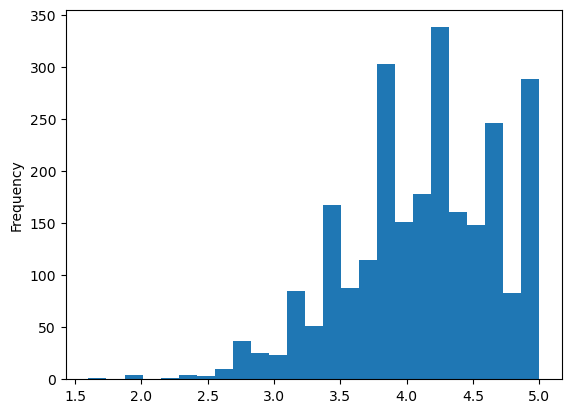

In [15]:
# Answer to 3c
dfmarketClean["Customer_Rating"].plot.hist(bins=25)

**Explanation** This statement is True since from this histogram it's skewed to the right which are 4 star to 5 stars. And the lower than 3-star counts are lower than 5% of the total, although there are still around lower than 50 counts 3-star ratings, and some 2.5-3.0 ratings that's lower than 50 counts, they can be ignored since the majority are above 150 counts mostly

## Question 4: Hypothesis Testing [4 points]

### Question 4a
The marketing team hypothesizes that products that are "On Promotion" receive higher customer ratings on average than products that are not on promotion. Is this hypothesis true or false? Provide evidence to support your answer.

In [16]:
# Answer to 4a
dfonpromotion = dfmarketClean[dfmarketClean["On_Promotion"]=="Yes"]
dfonpromotion["Customer_Rating"].describe()

count    416.000000
mean       4.147356
std        0.525121
min        2.000000
25%        3.800000
50%        4.200000
75%        4.500000
max        5.000000
Name: Customer_Rating, dtype: float64

In [17]:
dfnopromotion = dfmarketClean[dfmarketClean["On_Promotion"]=="No"]
dfnopromotion["Customer_Rating"].describe()

count    2094.000000
mean        4.115186
std         0.582307
min         1.600000
25%         3.800000
50%         4.200000
75%         4.500000
max         5.000000
Name: Customer_Rating, dtype: float64

**Explanation** Yes it is true, by filtering the on promotion and not onpromotion products by "yes" and "no", and see their separate customer ratings, use describe function to get the datas, i can see that the On promotion's mean rating is 4.147356; not on promotion's mean is 4.115186, 4.147356>4.115186.

### Question 4b
The pricing team believes that customer purchase decisions are influenced more by Price than by Customer Rating. To test this hypothesis, compare:

    - The average quantity sold for products with above-average ratings 
    versus 
    - The average quantity sold for products with below-average price
    
 Summarize your findings. Is the above analysis sufficient to conclude whether Price or Ratings is the dominant factor? If not, explain what is missing from the analysis.

In [18]:
dfmarketClean["Customer_Rating"].describe()

count    2510.000000
mean        4.120518
std         0.573249
min         1.600000
25%         3.800000
50%         4.200000
75%         4.500000
max         5.000000
Name: Customer_Rating, dtype: float64

In [19]:
dftoprating = dfmarketClean[dfmarketClean["Customer_Rating"]>4.120518]
dftoprating["Quantity_Sold"].mean()

28.4375

In [20]:
# Answer to 4b
dfmarketClean["Price"].describe()

count    2547.000000
mean       14.884672
std        17.307859
min         0.290000
25%         6.585000
50%        10.990000
75%        17.285000
max       226.990000
Name: Price, dtype: float64

In [21]:
dfbelowprice = dfmarketClean[dfmarketClean["Price"]<14.884672]
dfbelowprice["Quantity_Sold"].mean()

33.897212543554005

**Explanation** the hypothesis is customer purchase decisions are influenced more by Price than by Customer Rating, this is True. Since the average for quantity sold influenced by below average price is 33.897212543554005, this is larger than the average for quantity sold influenced by above-average ratings (33.897212543554005>28.4375)

### Question 4c
Pareto's Principle (also known as the 80/20 rule) suggests that a small percentage of products drive the majority of profits. To examine this hypothesis, calculate the total profit from the top 25% most expensive products and compare it to the aggregate profit from all products.

    Hint: Look at the 75th percentile of Price and select products that are priced above this level.

In [22]:
# Answer to 4c
dfmarketClean["Price"].describe()

count    2547.000000
mean       14.884672
std        17.307859
min         0.290000
25%         6.585000
50%        10.990000
75%        17.285000
max       226.990000
Name: Price, dtype: float64

In [23]:

dfhigherprice = dfmarketClean[dfmarketClean['Price']>17.285000]

print("The percentage of the overall wealth among the top quartile is",dfhigherprice["Price"].sum()/dfmarketClean["Price"].sum())

The percentage of the overall wealth among the top quartile is 0.5584573026588934


**Explanation** The hypothesis is that a small percentage of products drive the majority of profits, and Yes this is true. it is indeed clear that the  total profit from the top 25% most expensive products is more than the aggregate profit from all products.

## Question 5: Scenario Analysis [4 points]

### Question 5a
If SuperSave wanted to reduce in-store shelf space by 20%, which department should they focus on first? Explain your reasoning.

    Hint: Use the Remaining_Inventory Column and assume that all available inventory is stored on the shelf. There are many different ways to answers this question - as long as you explain your choices, any reasonable answer will be accepted. 

In [24]:
# Answer to 5a


In [25]:
dfdata = dfmarketClean.groupby("Department")["Remaining_Inventory"].sum()

<Axes: ylabel='Remaining_Inventory'>

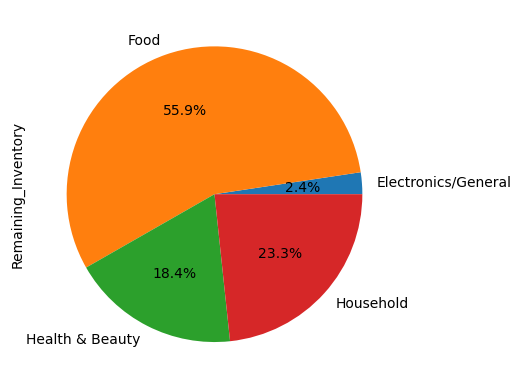

In [26]:
dfdata.plot.pie(autopct="%0.1f%%")

**Explanation** SuperSave should focus on food Department first, since i groupedby to count each category in the "remaining inventory" field, and sum all the remaining inventory by category, so that i got my result, which is the sum of remaining inventory is highest in food category.

### Question 5b
The inventory manager is concerned about "high-value slow movers" - expensive products that don't sell well but tie up capital.

a) Filter the data to identify high-value slow movers, defined as products with Price > $20 that are selling poorly (Quantity_Sold < 10). How many high-value slow movers exist in the dataset?

b) Which department has the most high-value slow movers?

In [27]:
# Answer to 5b
df_highvalue=dfmarketClean[dfmarketClean["Price"]>20]
df_highvalue_slowmover=df_highvalue[df_highvalue["Quantity_Sold"]<10]
print('The number of high-value slow movers exist in the dataset is',len(df_highvalue_slowmover))

The number of high-value slow movers exist in the dataset is 347


<Axes: ylabel='count'>

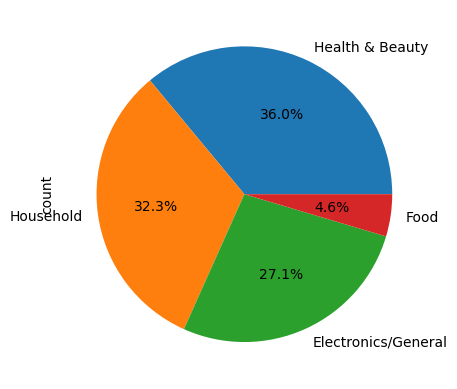

In [28]:
dfd = df_highvalue_slowmover["Department"]
dfd.value_counts().plot.pie(autopct="%0.1f%%")

**Explanation**  Health and beauty department has the most high-value slow movers.(36%>32.3%>27.1%>4.6%)

### Question 5c
Which department benefits the most from promotions? Compare average sales with and without promotions for each department and discuss the implications of your findings.

In [29]:
# Answer to 5c
dfWithpromotion = dfmarketClean[dfmarketClean["On_Promotion"]=="Yes"]
dfWithpromotion["Department"].value_counts(normalize=True)

Department
Food                   0.678404
Household              0.213615
Health & Beauty        0.098592
Electronics/General    0.009390
Name: proportion, dtype: float64

In [30]:

dfWithoutpromotion = dfmarketClean[dfmarketClean["On_Promotion"]=="No"]
dfWithoutpromotion["Department"].value_counts(normalize=True)

Department
Food                   0.520038
Household              0.252240
Health & Beauty        0.172560
Electronics/General    0.055163
Name: proportion, dtype: float64

**Explanation** Food department benefits the most  from promotions, as shown in the data with promotion, but Food is also the one that hurt the most without promotions, so I imply that maybe it's because Food has the most number of items on promotion, that's why the proportion is so high. and the price of food is relatively low compared to household, Health & Beauty       ;Electronics/General, so it's more likely to go on sale, promotion.